In [17]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [78]:
train = pd.read_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\train.csv")
test = pd.read_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\test.csv")

In [79]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Y_train=train["label"]
Y_train.head()
X_train=train.drop(labels=["label"],axis=1)


In [81]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [82]:

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [83]:

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [85]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [86]:
X_train.shape

(42000, 28, 28, 1)

In [102]:
random_seed = 6

In [103]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

TypeError: Invalid dimensions for image data

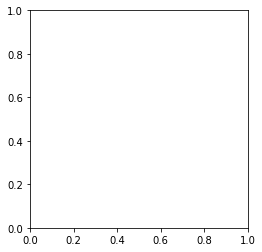

In [104]:
# Some examples
g = plt.imshow(X_train[2])

In [105]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [106]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [107]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
26880/26880 [==============================] - 2s 69us/step - loss: 0.0582 - acc: 0.9806
Epoch 2/10
26880/26880 [==============================] - 1s 55us/step - loss: 0.0289 - acc: 0.9906
Epoch 3/10
26880/26880 [==============================] - 1s 56us/step - loss: 0.0208 - acc: 0.9934
Epoch 4/10
26880/26880 [==============================] - 1s 55us/step - loss: 0.0159 - acc: 0.9950
Epoch 5/10
26880/26880 [==============================] - 1s 54us/step - loss: 0.0125 - acc: 0.9961
Epoch 6/10
26880/26880 [==============================] - 2s 56us/step - loss: 0.0100 - acc: 0.9969
Epoch 7/10
26880/26880 [==============================] - 2s 60us/step - loss: 0.0082 - acc: 0.9975
Epoch 8/10
26880/26880 [==============================] - 2s 64us/step - loss: 0.0065 - acc: 0.9981
Epoch 9/10
26880/26880 [==============================] - 2s 60us/step - loss: 0.0050 - acc: 0.9987
Epoch 10/10
26880/26880 [==============================] - 2s 56us/step - loss: 0.0040 - acc: 0.9990

In [108]:
test_loss, test_acc = model.evaluate(X_val, Y_val)

print('Test accuracy:', test_acc)

6720/6720 [==============================] - 0s 53us/step
Test accuracy: 0.9938244005044301


In [109]:
predictions = model.predict(test)

In [110]:
predictions[0]

array([7.0175898e-10, 6.9265145e-13, 9.9999964e-01, 3.5400743e-07,
       2.8623151e-09, 3.1533862e-12, 2.4147551e-10, 3.2545826e-09,
       6.1355583e-09, 2.4964877e-10], dtype=float32)

In [111]:
np.argmax(predictions[0])

2

In [112]:
results=model.predict(test)

In [113]:
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [114]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\jims4th.csv",index=False)